<a href="https://colab.research.google.com/github/ucchol/models/blob/master/EDA_%26_Visualization_on_Data_Science_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [3]:
sns.set_theme()
sns.set(rc = {"figure.figsize":(10,6), "figure.dpi":300})

In [4]:
!pip install country_converter -q
import country_converter as coco

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.6 MB/s eta 0:00:00


In [6]:
df=pd.read_csv('ds_salaries.csv')
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [7]:
df.shape

(3755, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [9]:
df.isnull().sum().sum()

0

In [10]:
print("Number of unique values in columns:\n\n", df.nunique())

Number of unique values in columns:

 work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64


Let's see top 10 job titles in 2023 using the bar plot.

[Text(2, 0, '499'),
 Text(2, 0, '370'),
 Text(2, 0, '307'),
 Text(2, 0, '158'),
 Text(2, 0, '55'),
 Text(2, 0, '52'),
 Text(2, 0, '46'),
 Text(2, 0, '40'),
 Text(2, 0, '32'),
 Text(2, 0, '22')]

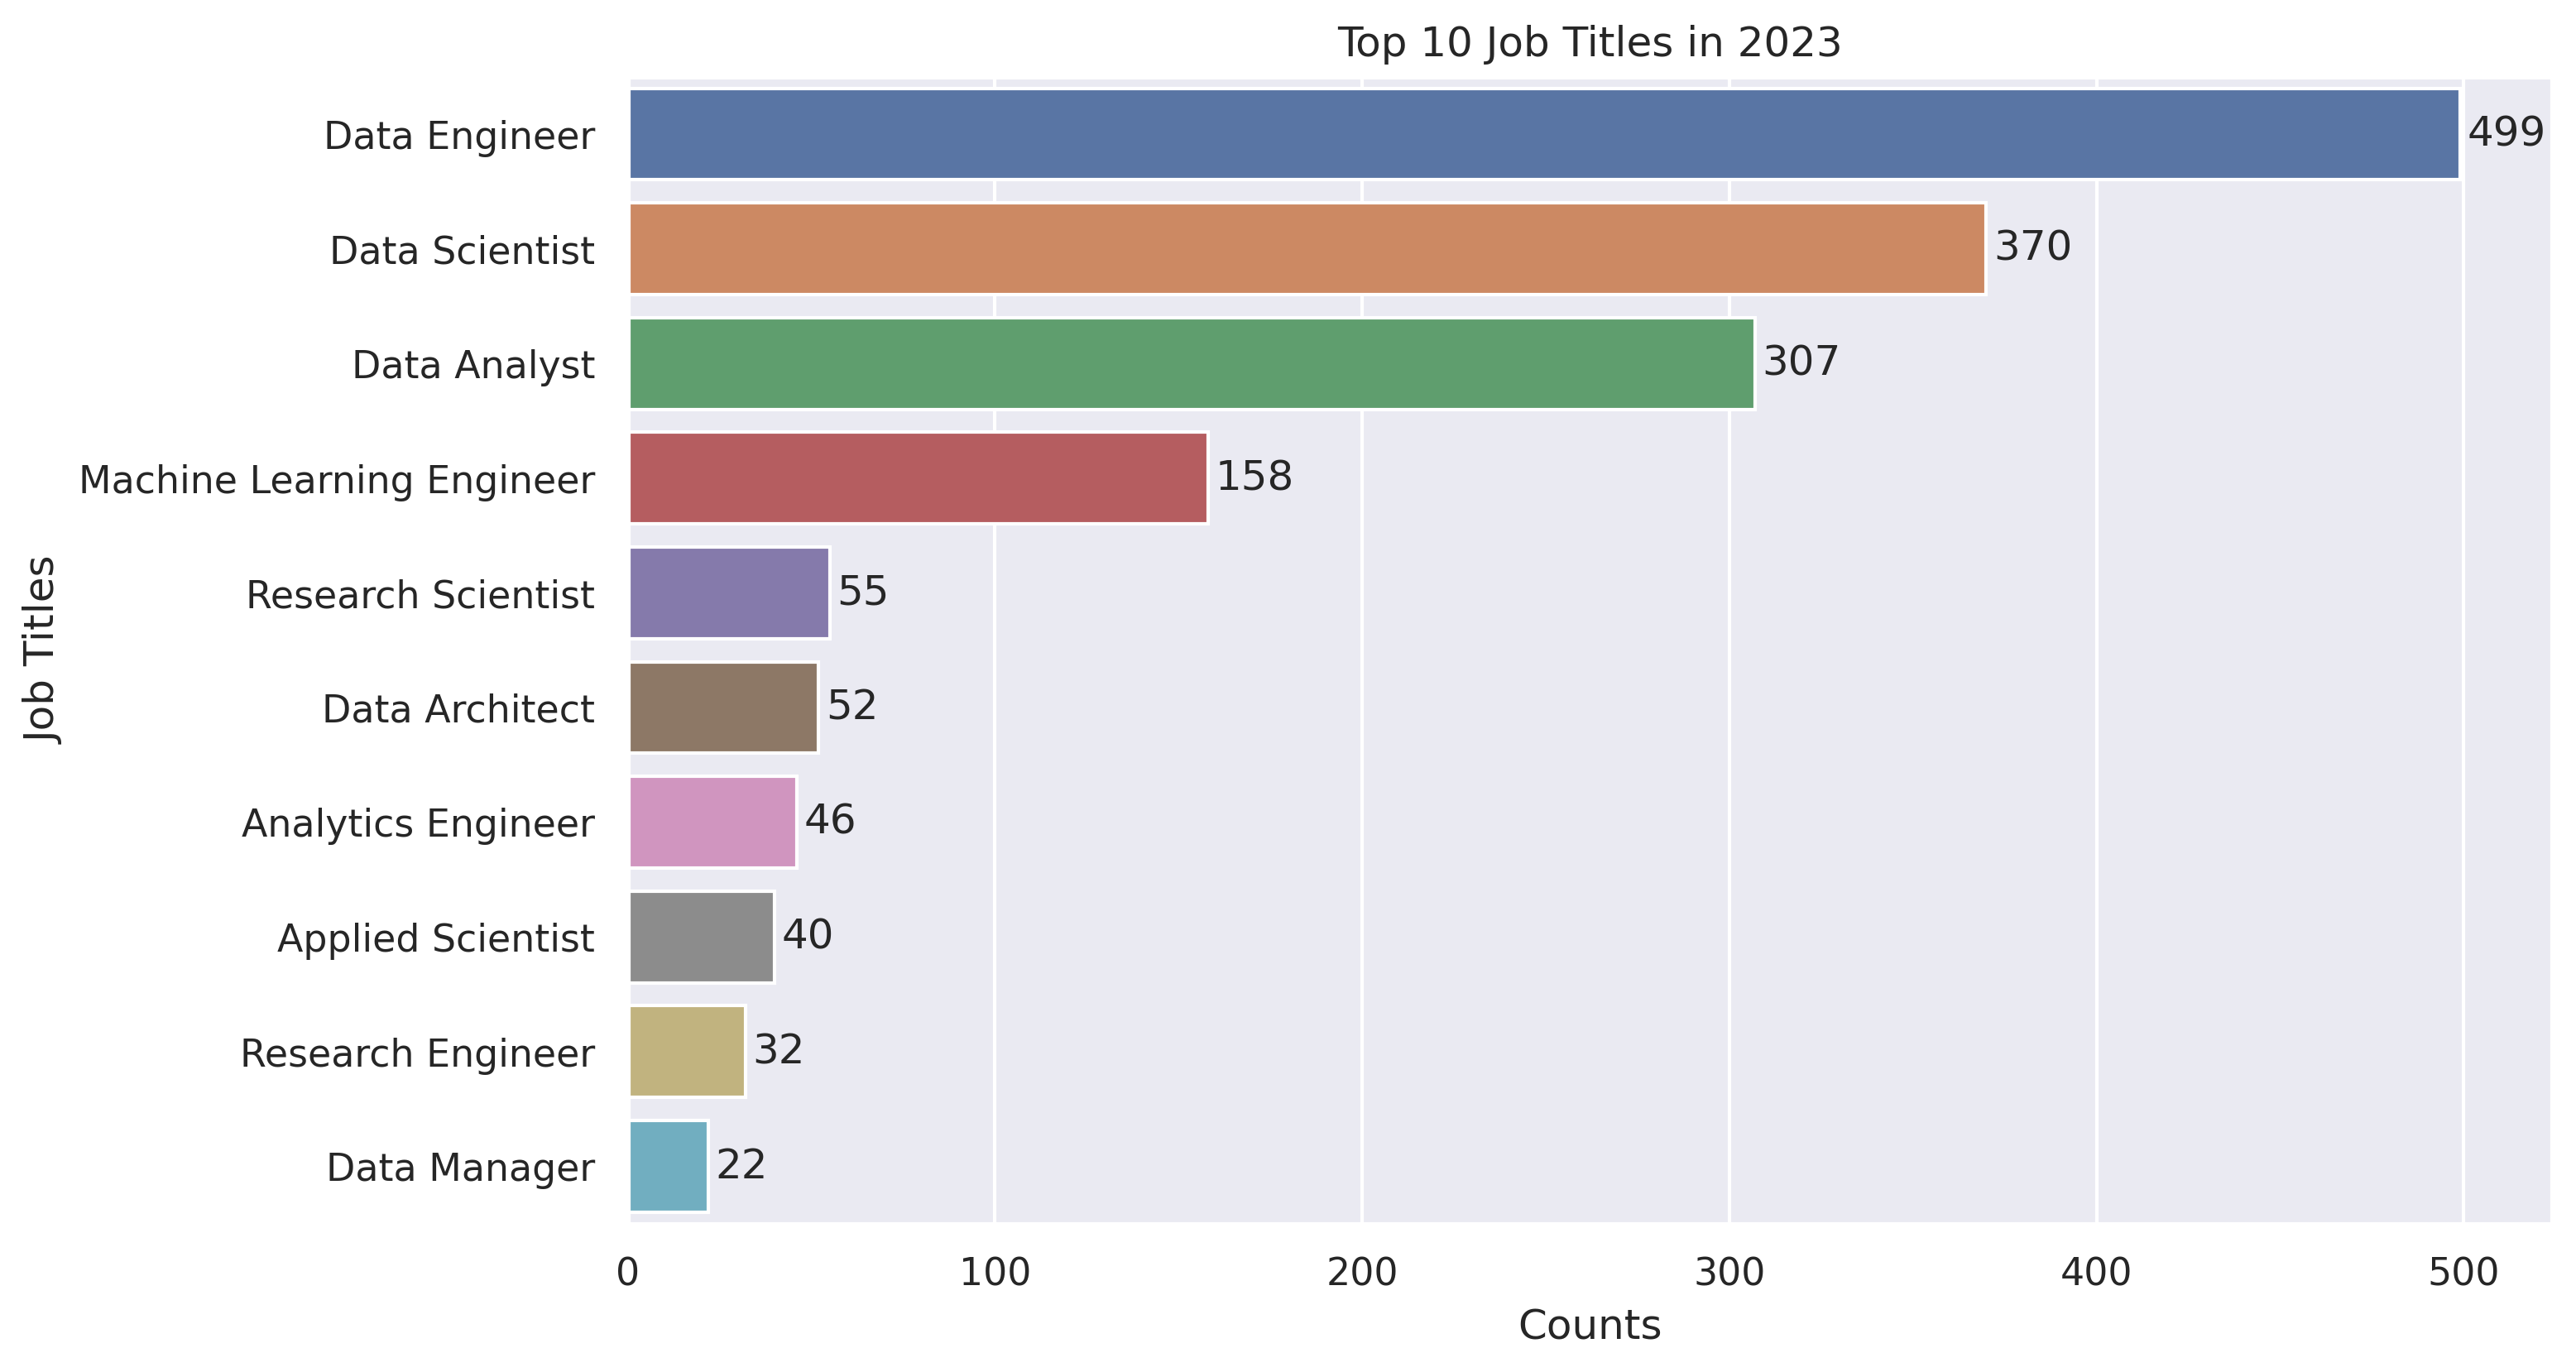

In [11]:
jobs = df[df['work_year']==2023]['job_title'].value_counts().nlargest(10).reset_index()
fig, ax = plt.subplots()
ax = sns.barplot(ax = ax, data = df , y = jobs['index'], x = jobs.job_title)
ax.set(ylabel='Job Titles',xlabel='Counts', title='Top 10 Job Titles in 2023')
ax.bar_label(ax.containers[0], padding = 2)

let's look at the unique values in the experience_level column.

In [12]:
df['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

there are 4 unique values which are SE(Senior level/expert) , MI(medium level/intermediate) , EN (Entry level) and EX(Executive level). Lets rename these values with the rename method.

In [14]:
df['experience_level'] = df['experience_level'].replace('EN','Entry-level/Junior')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level/Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level/Expert')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level/Director')

Let's draw a bar plot of experience levels.

[Text(0, 0, '2516'), Text(0, 0, '805'), Text(0, 0, '320'), Text(0, 0, '114')]

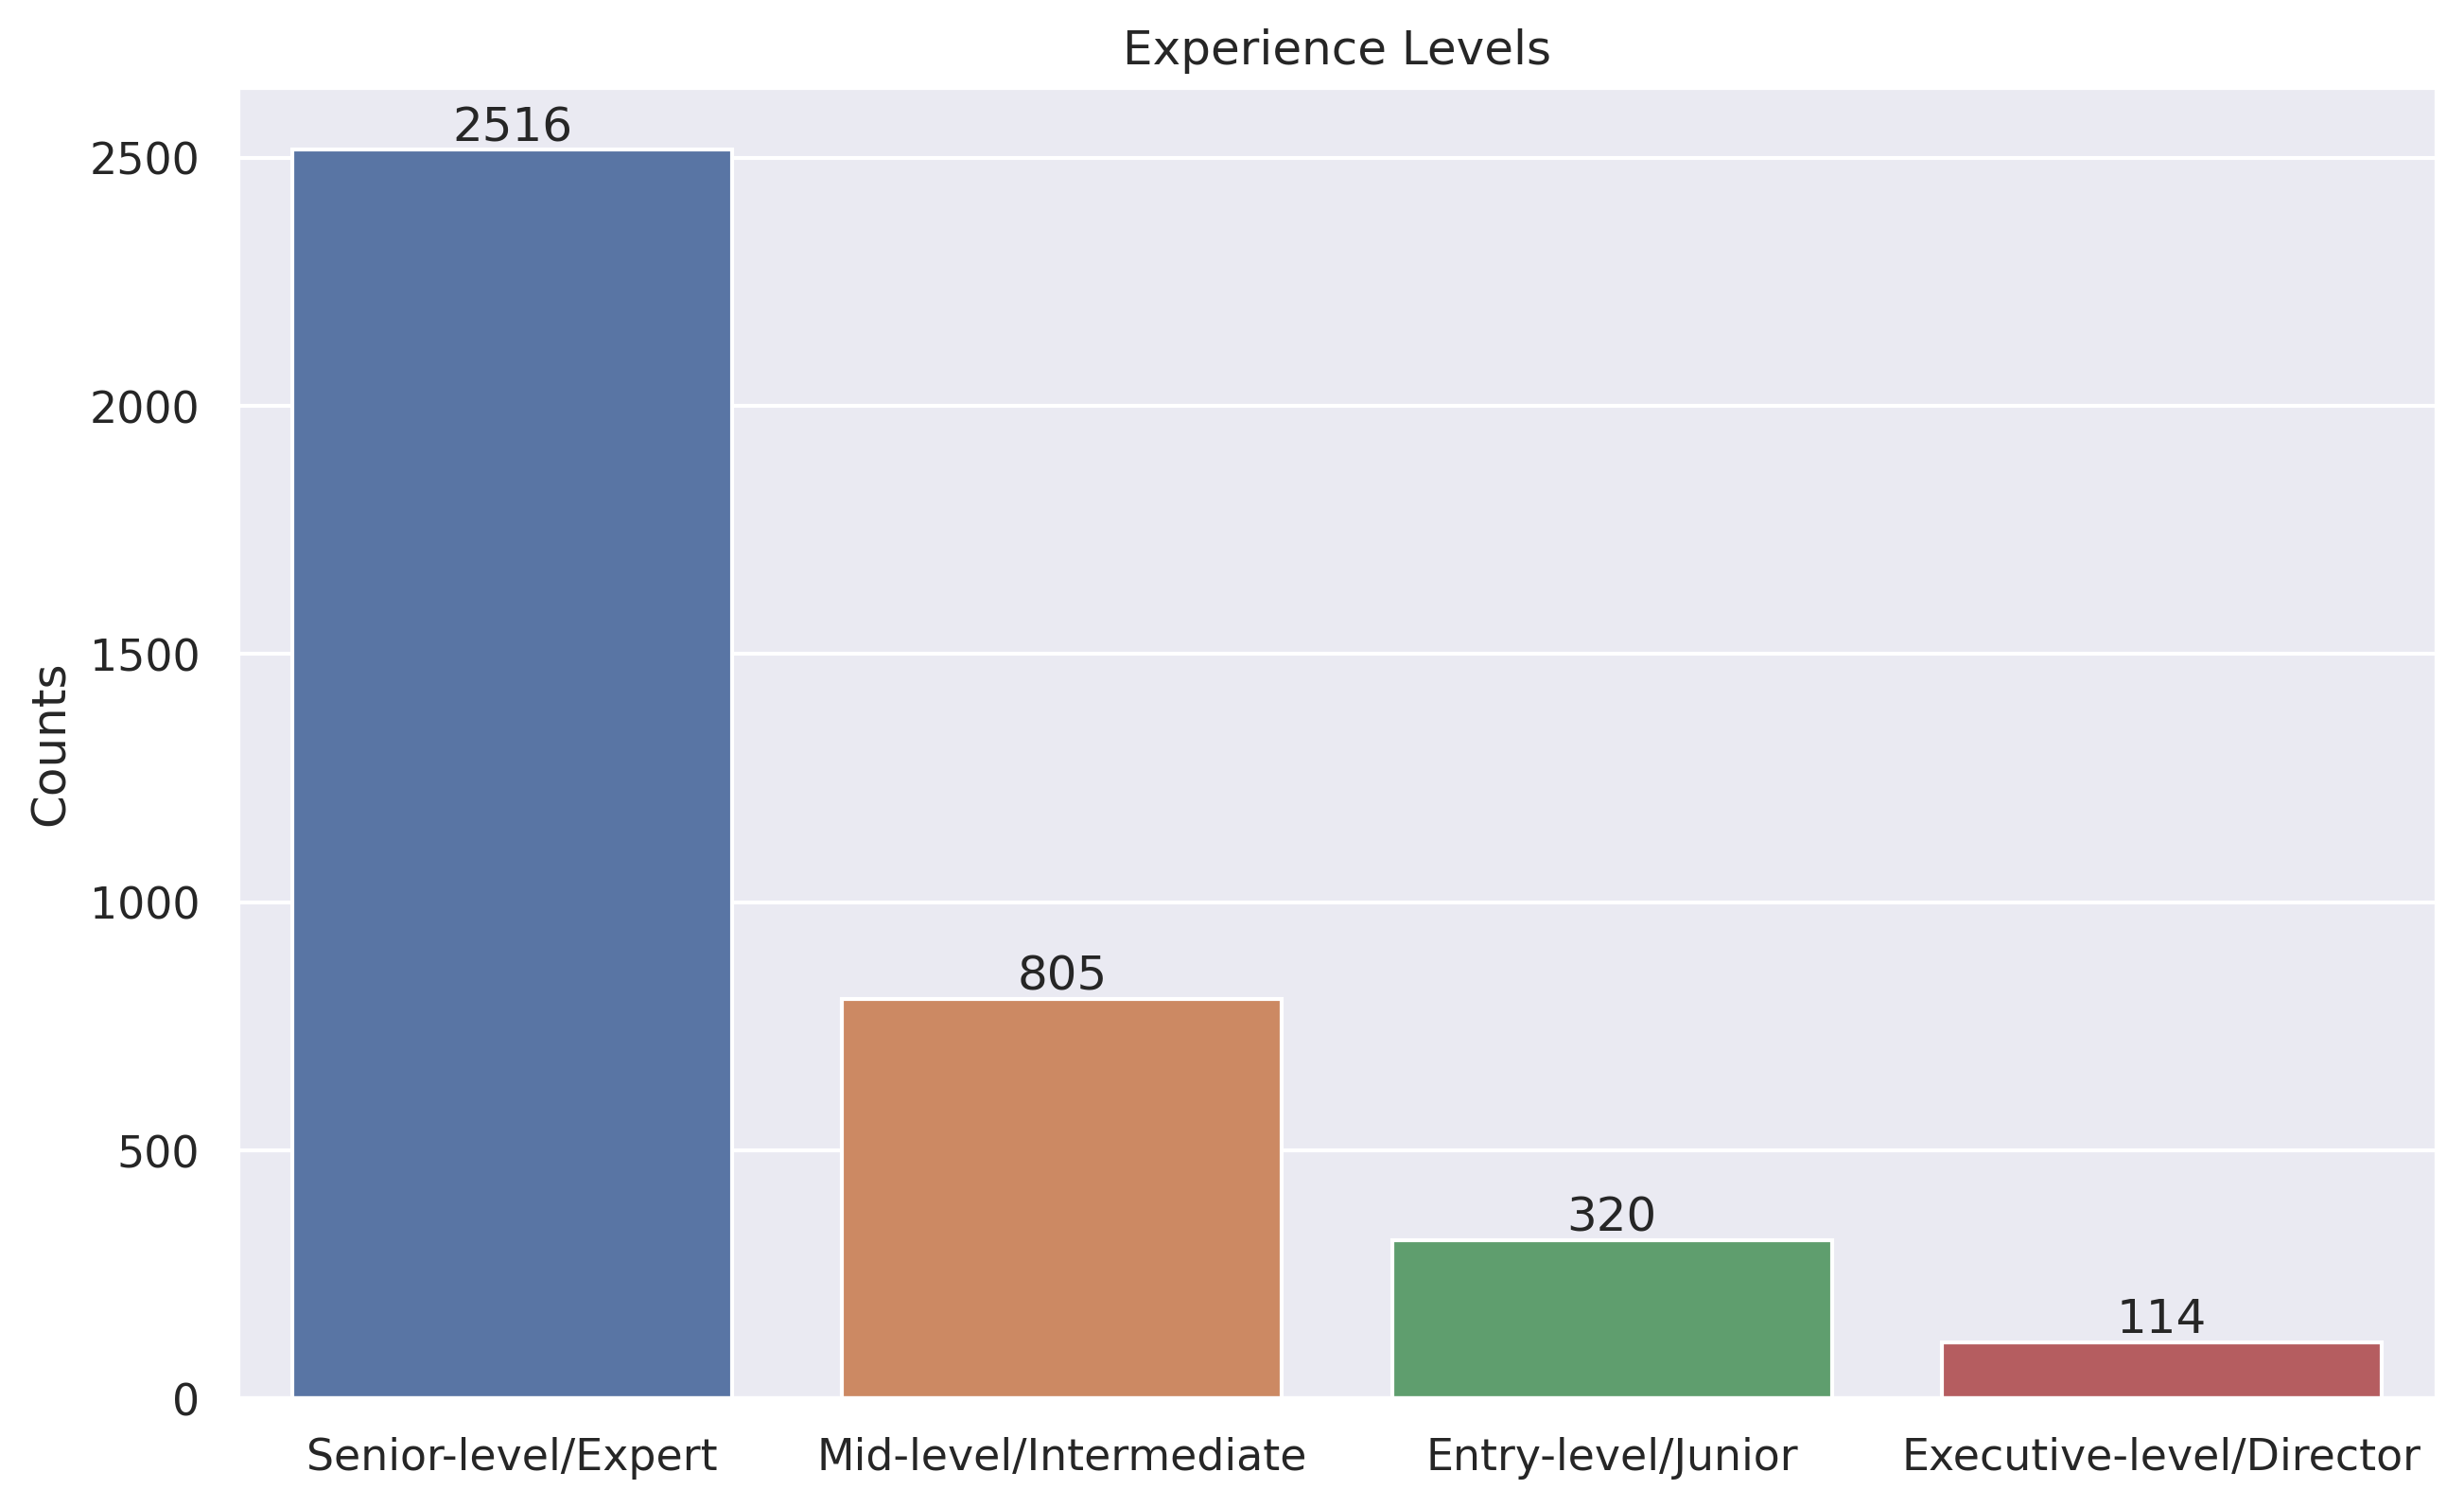

In [15]:
fig, ax = plt.subplots()
sns.countplot(ax = ax, data = df, x = df.experience_level)
ax.set(xlabel='', ylabel='Counts', title='Experience Levels')
ax.bar_label(ax.containers[0])

Now, let's look at the unique values in the employment_type column.

In [16]:
df['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

there are 4 unique values which are FT(Full-Time), PT(Part-Time), CT(Contract) and FL(Freelance). Lets rename these values with the rename method.

In [17]:
df['employment_type'] = df['employment_type'].replace('FT','Full-Time')
df['employment_type'] = df['employment_type'].replace('PT','Part-Time')
df['employment_type'] = df['employment_type'].replace('CT','Contract')
df['employment_type'] = df['employment_type'].replace('FL','Freelance')

Let's draw a bar plot of experience types.

[Text(0, 0, '113'), Text(0, 0, '1'), Text(0, 0, '0'), Text(0, 0, '0')]

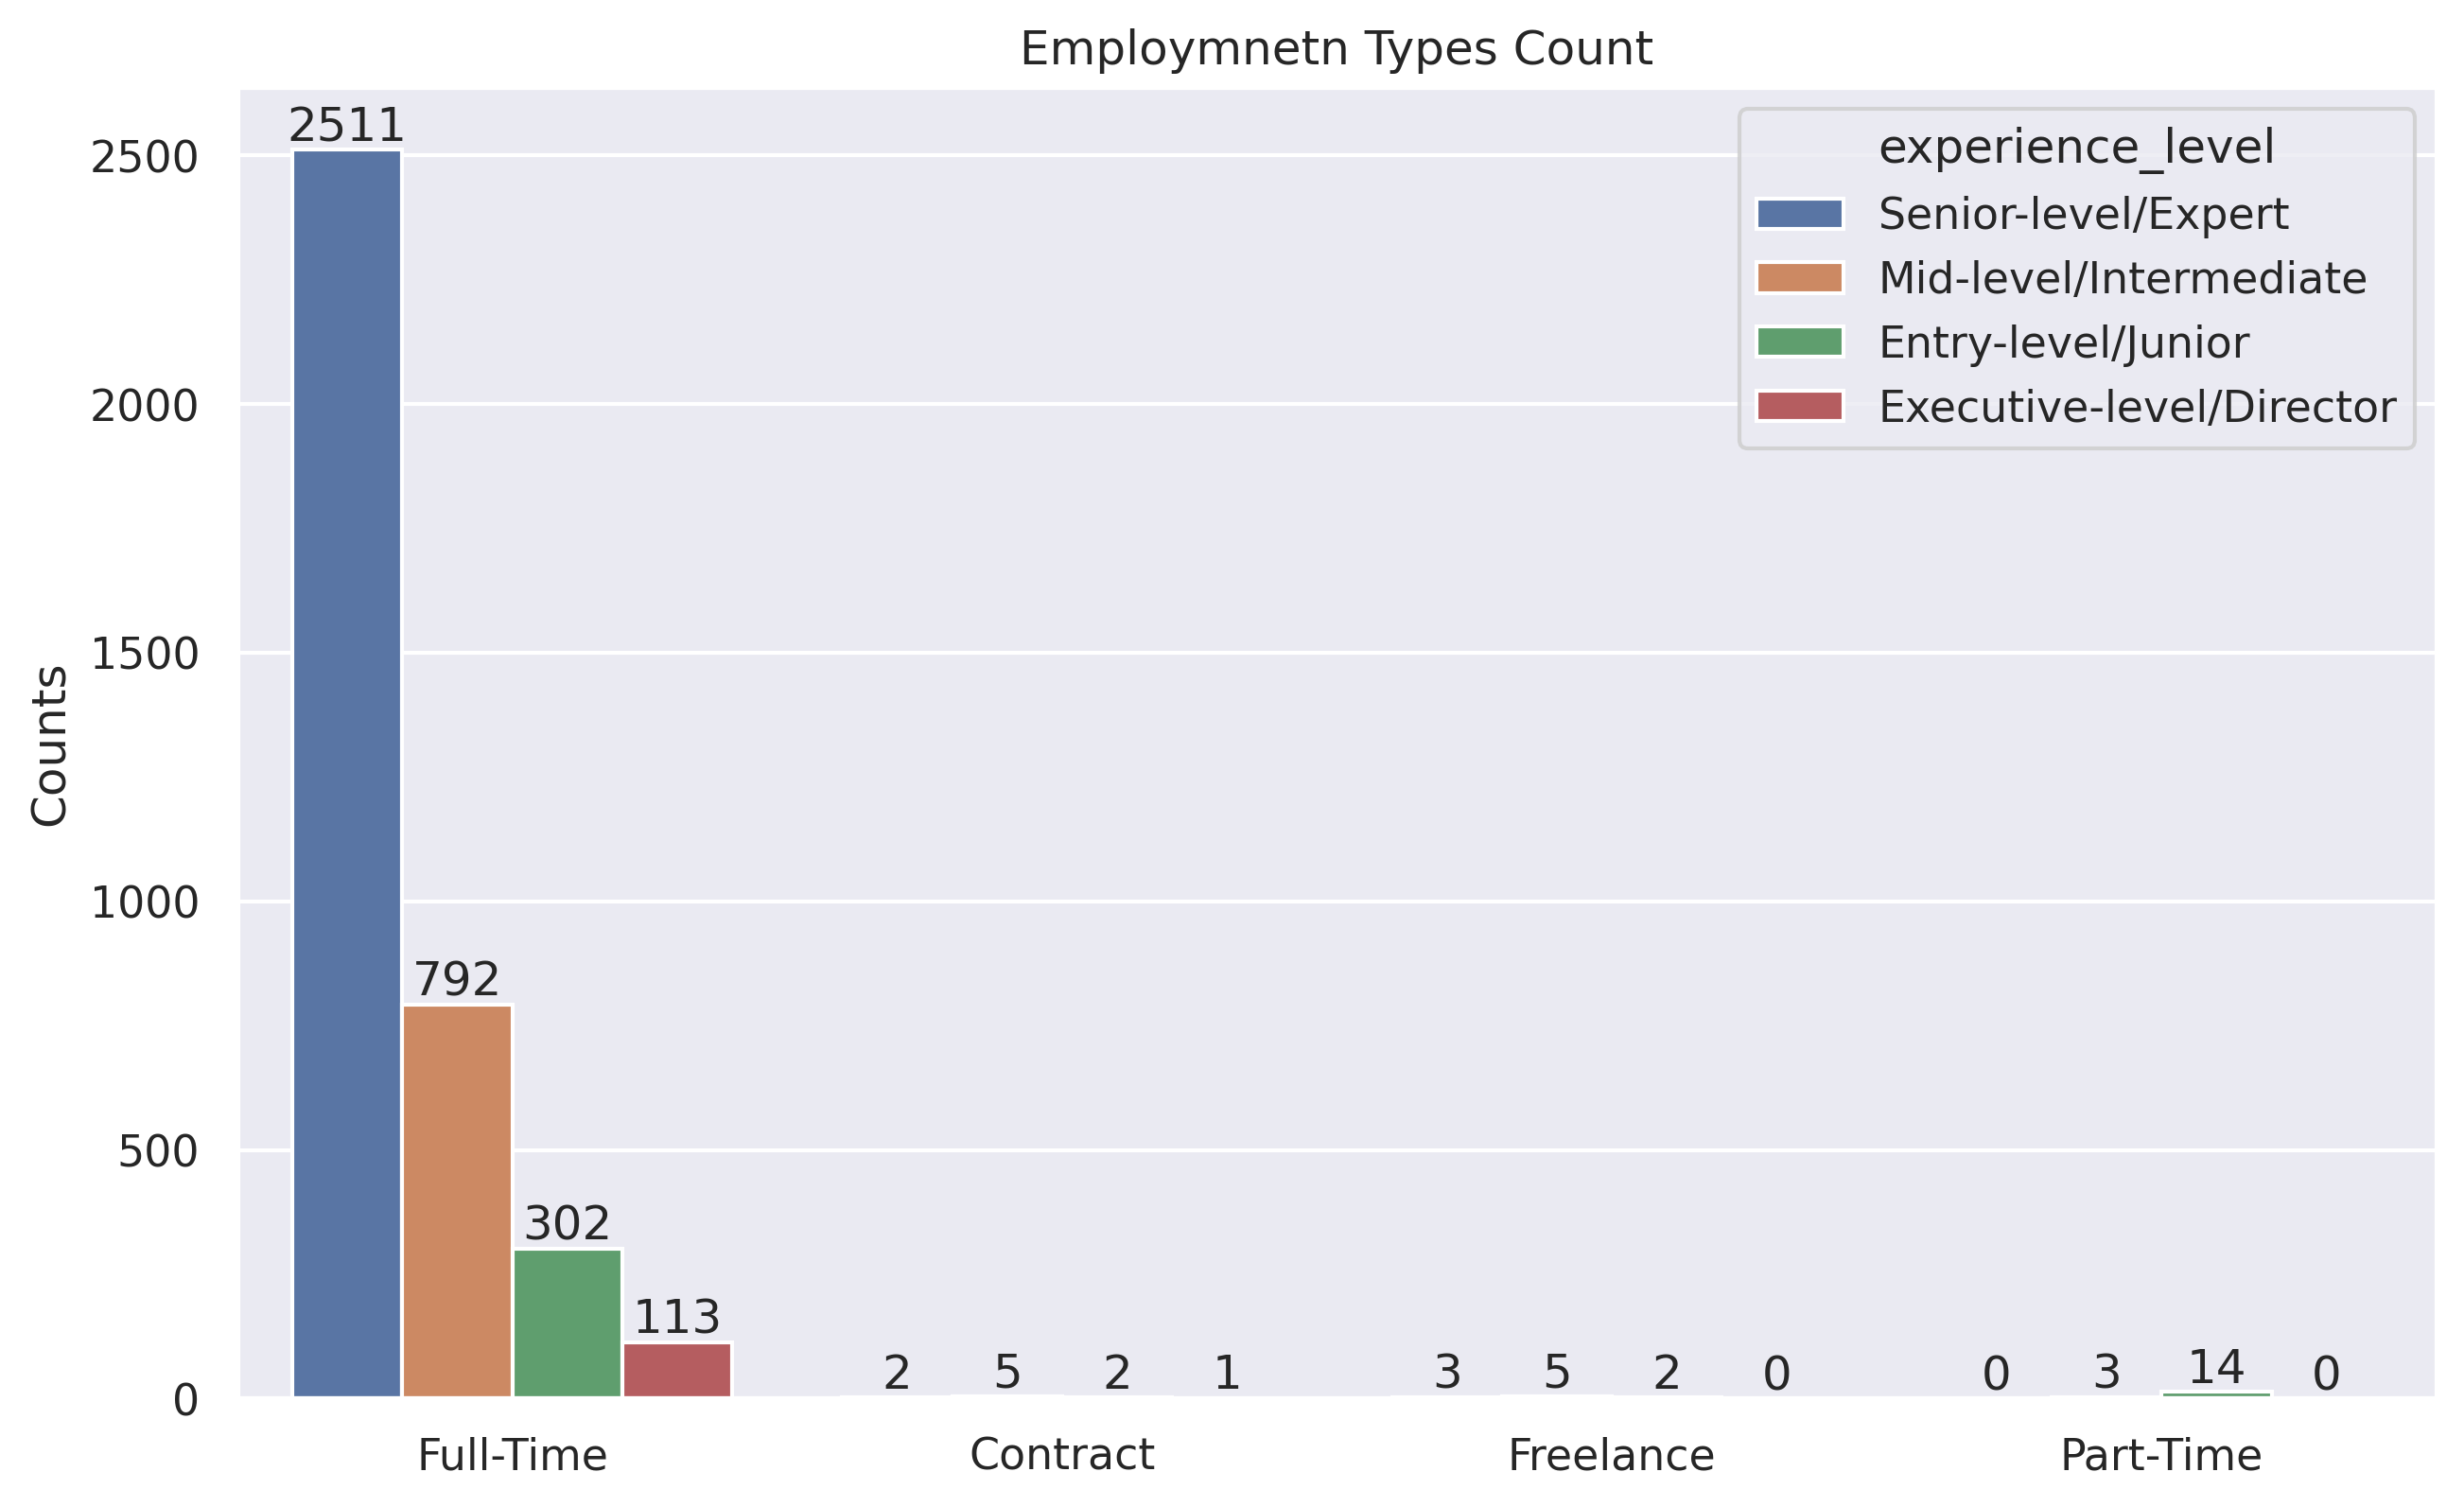

In [18]:
fig, ax = plt.subplots()
sns.countplot(ax = ax, data = df, x = df.employment_type, hue = 'experience_level')

ax.set(xlabel='', ylabel='Counts', title='Employmnetn Types Count')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])

Average Salaries based on Experiance Level

[Text(0, 2, '149367'),
 Text(0, 2, '27750'),
 Text(0, 2, '50000'),
 Text(0, 2, '17779')]

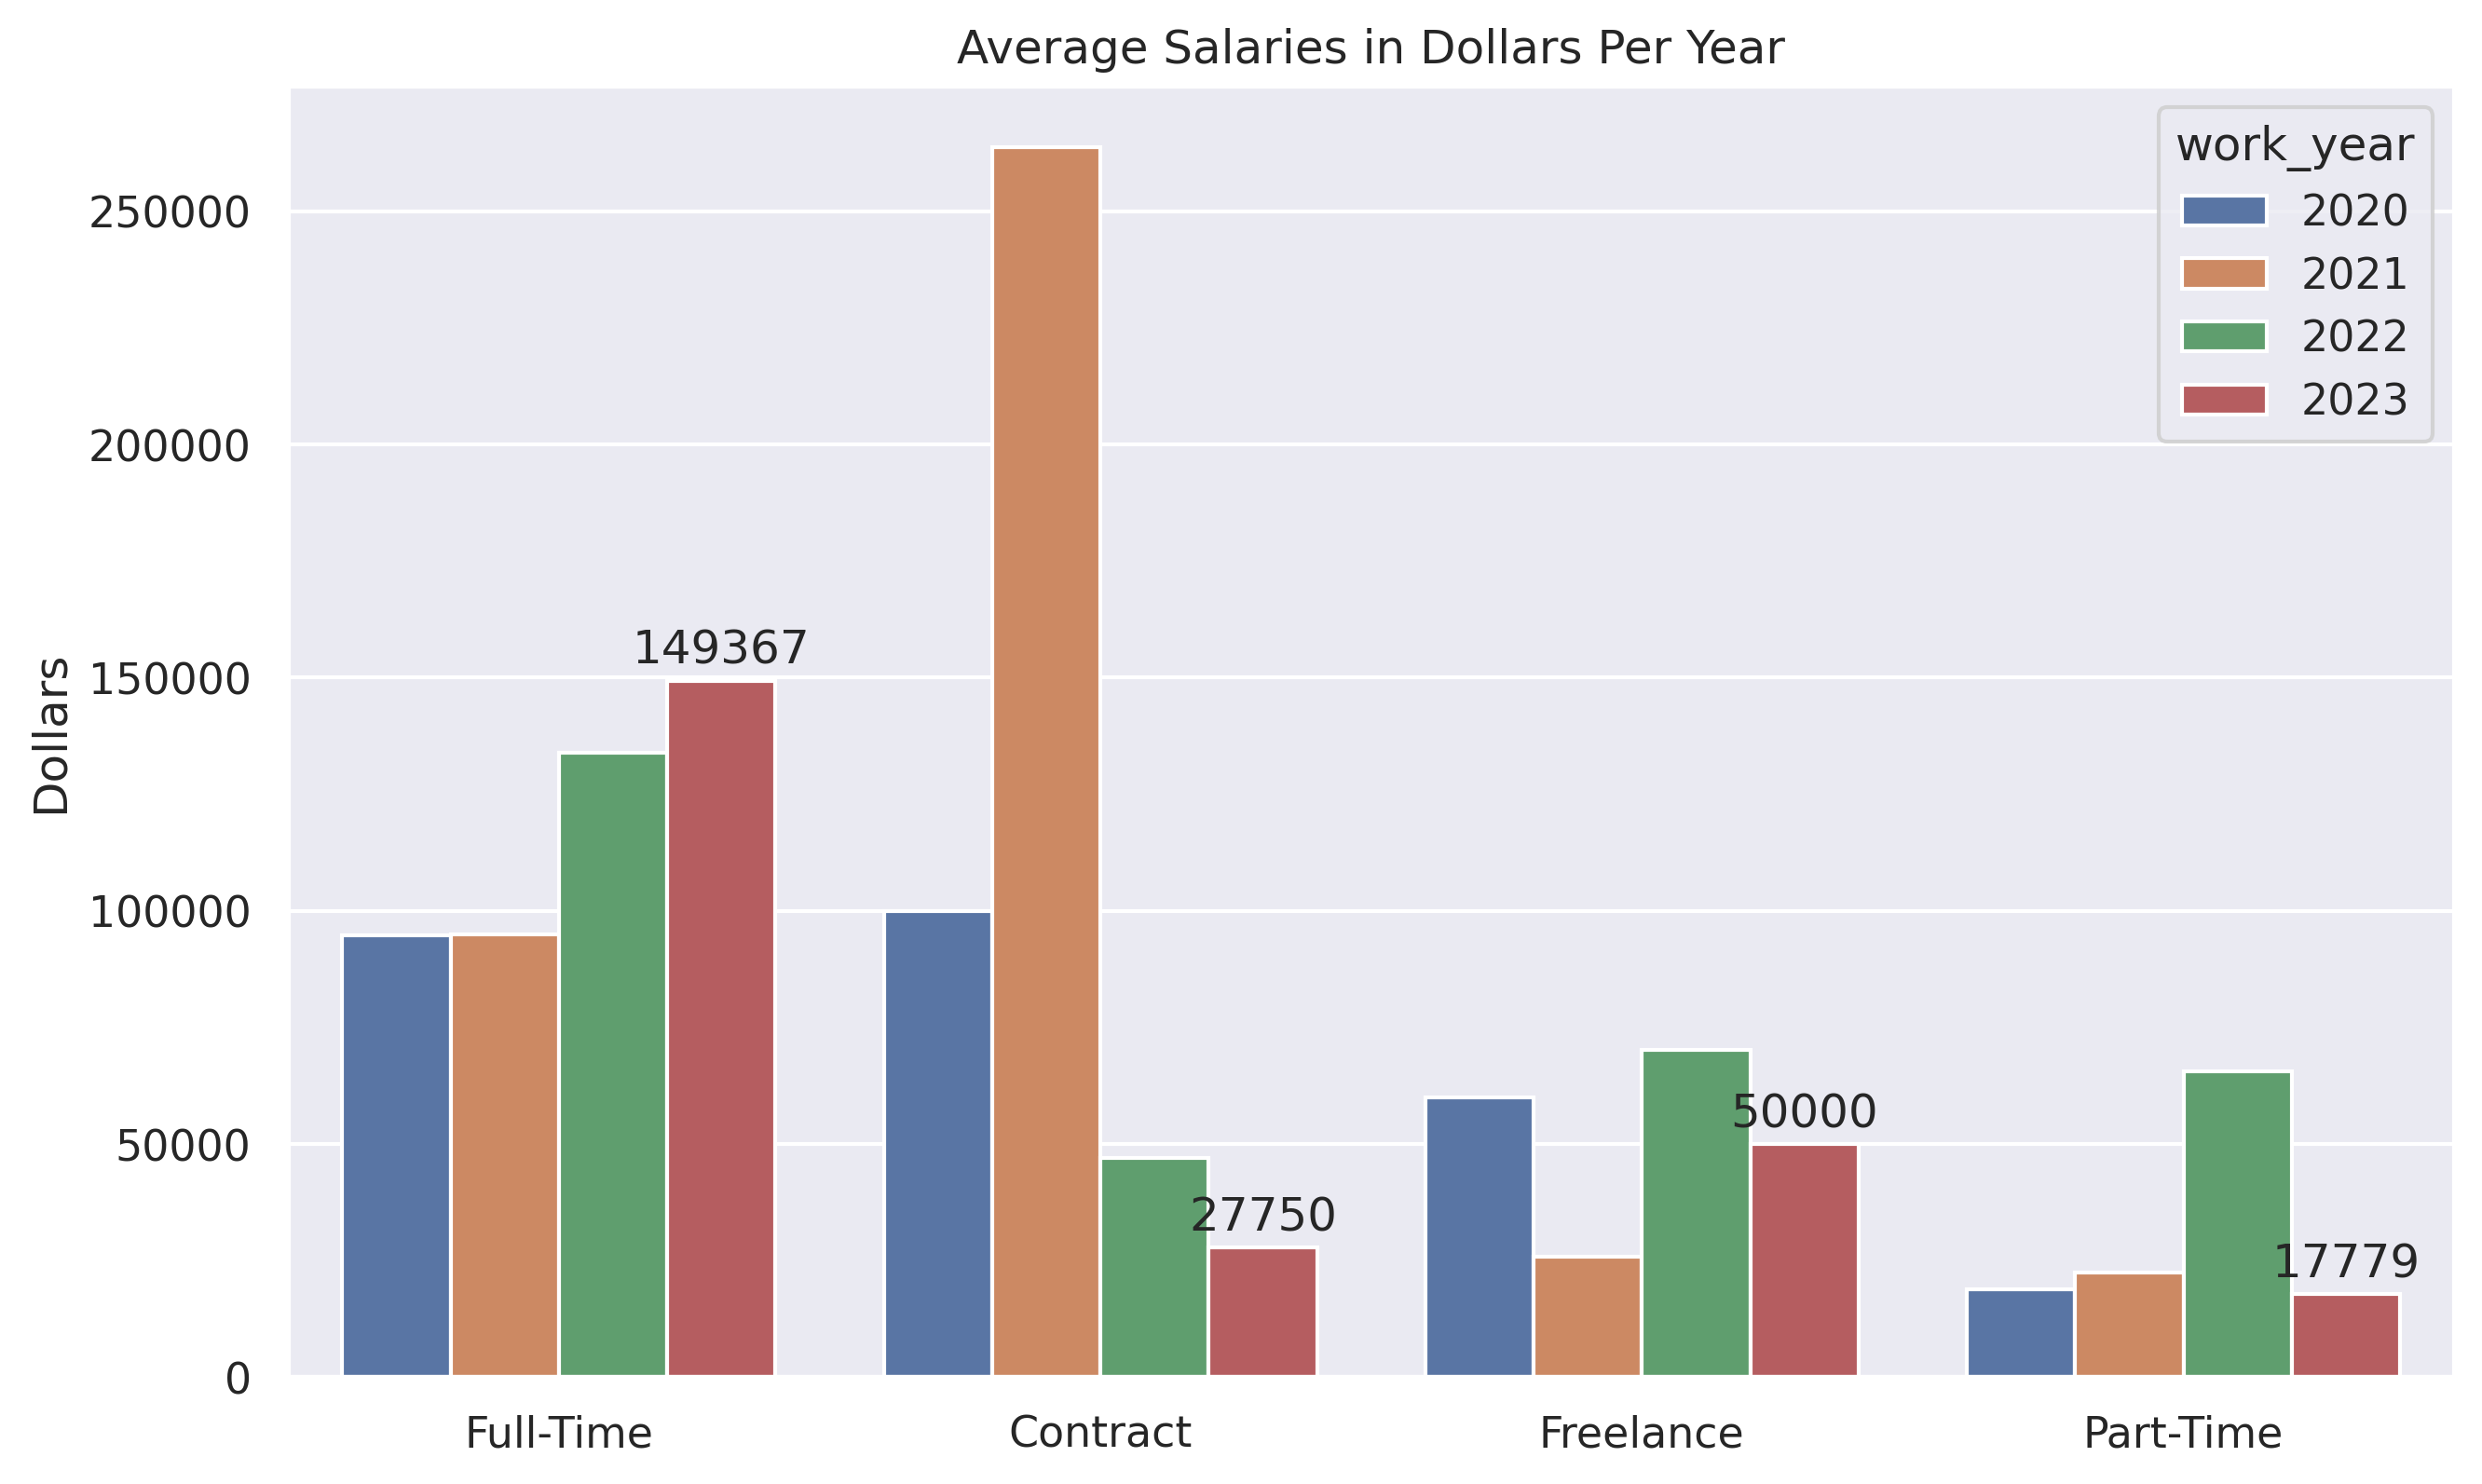

In [19]:
avg_salaries = df.groupby('employment_type')['salary_in_usd'].mean().round(0).sort_values(ascending = False).reset_index()
fig, ax = plt.subplots()
sns.barplot(ax =ax,data = df , x = 'employment_type', y = 'salary_in_usd',errorbar = None, hue = 'work_year')
ax.set(xlabel='', ylabel='Dollars', title='Average Salaries in Dollars Per Year')
ax.bar_label(ax.containers[3], padding = 2)

Salaries based on Work Years

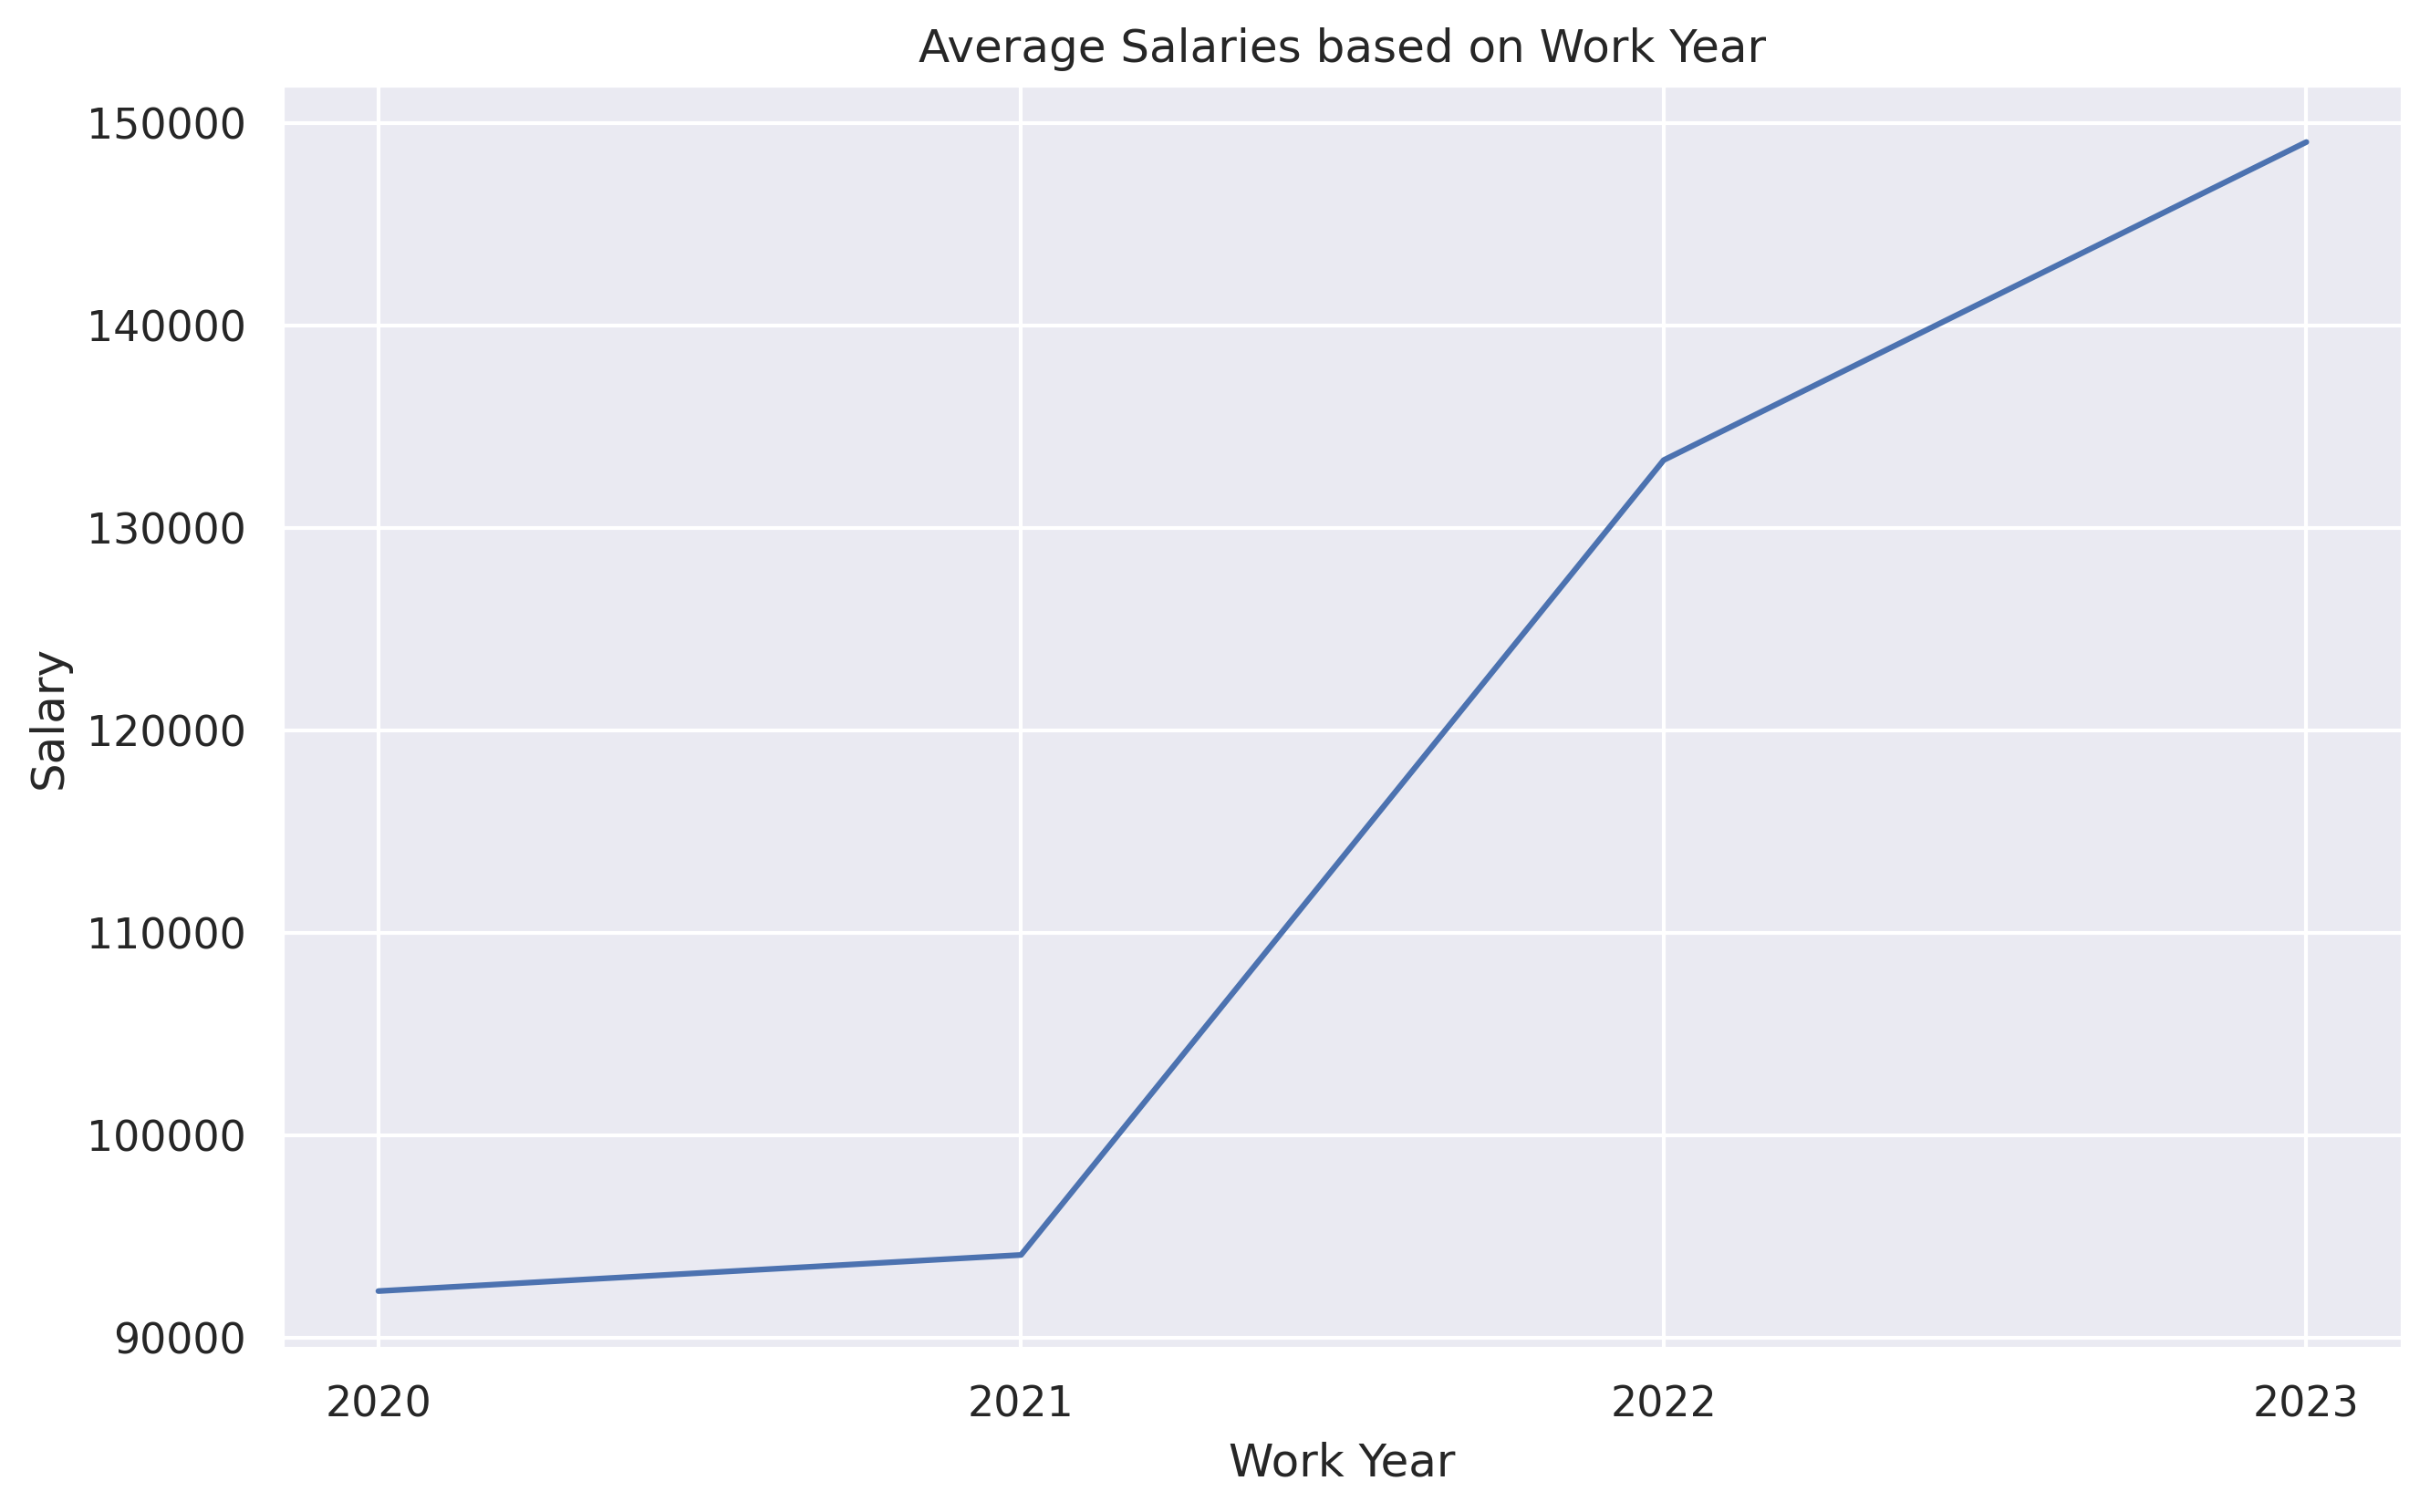

In [20]:
year_based_salary=df['salary_in_usd'].groupby(df['work_year']).mean()
plt.title("Average Salaries based on Work Year")
plt.xlabel('Work Year')
plt.ylabel('Salary')
sns.lineplot(x=['2020', '2021', '2022','2023'],y=year_based_salary)
plt.show()

Remote Jobs Locations

In [21]:
rr = df.groupby('company_location')['remote_ratio'].mean().reset_index()
rr['company_location'] =  coco.convert(names = rr['company_location'], to = "ISO3")
rr.head()

,company_location,remote_ratio
0,ARE,66.666667
1,ALB,50.000000
2,ARM,0.000000
3,ARG,100.000000
4,ASM,66.666667


In [22]:
fig = px.choropleth(rr,
                    locations = rr.company_location, 
                    color = rr.remote_ratio,                  
                    labels={'company_location':'Country','remote_ratio':'Remote Jobs Ratio'})
                    
fig.update_layout(title = "Remote Jobs Locations")
fig.show()